In [1]:
#Imports
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import duckdb

In [2]:
#Read in the dataset 
df = pd.read_csv('ds_challenge_v2_1_data.csv')
df.head(10)

,id,city_name,signup_os,signup_channel,signup_date,bgc_date,vehicle_added_date,vehicle_make,vehicle_model,vehicle_year,first_completed_date
0,1,Strark,ios web,Paid,1/2/16,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Strark,windows,Paid,1/21/16,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Wrouver,windows,Organic,1/11/16,1/11/16,NaN,NaN,NaN,NaN,NaN
3,4,Berton,android web,Referral,1/29/16,2/3/16,2/3/16,Toyota,Corolla,2016.0,2/3/16
4,5,Strark,android web,Referral,1/10/16,1/25/16,1/26/16,Hyundai,Sonata,2016.0,NaN
5,6,Strark,android web,Referral,1/18/16,1/18/16,1/22/16,Cadillac,DTS,2006.0,NaN
6,7,Strark,ios web,Paid,1/14/16,1/16/16,1/21/16,Toyota,Prius V,2014.0,1/23/16
7,8,Strark,ios web,Referral,1/26/16,2/5/16,NaN,NaN,NaN,NaN,NaN
8,9,Strark,NaN,Referral,1/5/16,NaN,NaN,NaN,NaN,NaN,NaN
9,10,Berton,ios web,Paid,1/25/16,NaN,NaN,NaN,NaN,NaN,NaN


<img src="Screenshot 2025-04-12 at 10.50.36 AM.png" width="" align="" />

In [3]:
# Check what percentage of signups happened in this data set
# Exploratory Data Analysis
df_drivers = df[df['first_completed_date'].notnull()]
df_nondrivers = df[df['first_completed_date'].isnull()]
print(len(df_drivers)/len(df)) #0.11223
print(len(df_nondrivers)/len(df)) #0.88776
print(len(df))

df_explore = df.copy()
df_explore["is_driver"] = df_explore['first_completed_date'].notnull().map({True: 'Driver', False: 'Non-driver'})
df_summary = df_explore['is_driver'].value_counts().reset_index()
df_summary.columns = ['Driver Type', 'Count']
df_summary.rename(index={'Non-driver': 'Driver'})
df_summary

0.11223276823759624
0.8877672317624038
54681


,Driver Type,Count
0,Non-driver,48544
1,Driver,6137


In [4]:
_dntk.DeepnoteChart(df_summary, """{"layer":[{"layer":[{"layer":[{"mark":{"clip":true,"type":"arc","color":"#2266D3","tooltip":true,"innerRadius":{"expr":"0"},"outerRadius":{"expr":"min(width, height) / 2"}},"encoding":{"color":{"axis":{"grid":false},"sort":null,"type":"nominal","field":"Driver Type","scale":{"scheme":"deepnote10"}},"order":{"axis":{"grid":false,"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"},"sort":"descending","type":"quantitative","field":"Count","scale":{},"stack":true,"format":{"type":"default","decimals":null},"aggregate":"sum","formatType":"numberFormatFromNumberType"},"theta":{"axis":{"grid":false,"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"},"type":"quantitative","field":"Count","scale":{},"stack":true,"format":{"type":"default","decimals":null},"aggregate":"sum","formatType":"numberFormatFromNumberType"}},"transform":[]}]}],"resolve":{"scale":{"color":"independent"}}}],"title":"","config":{"legend":{"disable":false}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{},"usermeta":{"seriesNames":["Count"],"seriesOrder":[0],"specSchemaVersion":2,"tooltipDefaultMode":true}}""")

> Of the Uber drivers who signed up (sign_up_date not null), only a small percentage actually started driving - specifically 11.22% out of n = 54681 drivers.

In [5]:
# Comparing drivers vs. nondrivers
df_explore.columns
print(df_explore.columns)
x = df_explore.groupby('is_driver')['vehicle_year'].mean().round(0).reset_index()
x

Index(['id', 'city_name', 'signup_os', 'signup_channel', 'signup_date',
       'bgc_date', 'vehicle_added_date', 'vehicle_make', 'vehicle_model',
       'vehicle_year', 'first_completed_date', 'is_driver'],
      dtype='object')


,is_driver,vehicle_year
0,Driver,2011.0
1,Non-driver,2010.0


In [6]:
!pip install geocoder==1.38.1


[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [7]:
print(df_explore["city_name"].value_counts())
print("There's 3 specific cities in this data set - Strark, Berton, Wrouver")


city_name
Strark     29557
Berton     20117
Wrouver     5007
Name: count, dtype: int64
There's 3 specific cities in this data set - Strark, Berton, Wrouver


<img src="Screenshot 2025-04-12 at 10.50.54 AM.png" width="" align="" />

<img src="Screenshot 2025-04-12 at 10.51.05 AM.png" width="" align="" />

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54681 entries, 0 to 54680
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    54681 non-null  int64  
 1   city_name             54681 non-null  object 
 2   signup_os             47824 non-null  object 
 3   signup_channel        54681 non-null  object 
 4   signup_date           54681 non-null  object 
 5   bgc_date              32896 non-null  object 
 6   vehicle_added_date    13134 non-null  object 
 7   vehicle_make          13223 non-null  object 
 8   vehicle_model         13223 non-null  object 
 9   vehicle_year          13223 non-null  float64
 10  first_completed_date  6137 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 4.6+ MB
/tmp/ipykernel_1056/2215785620.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing 

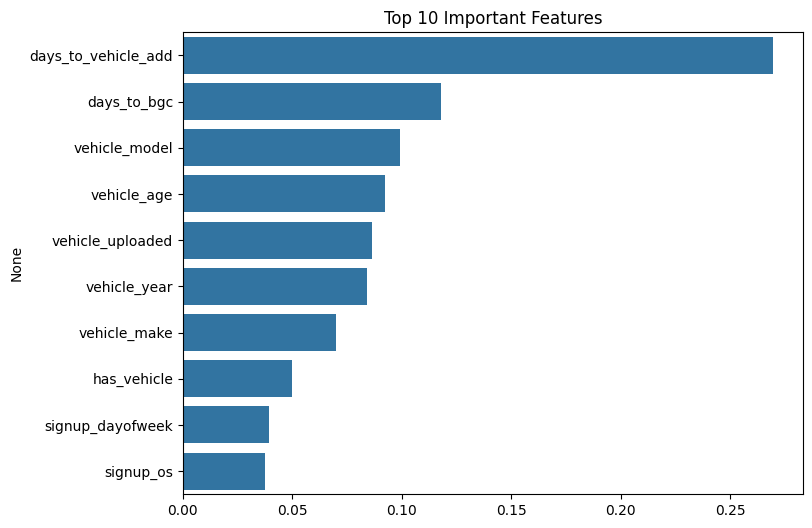

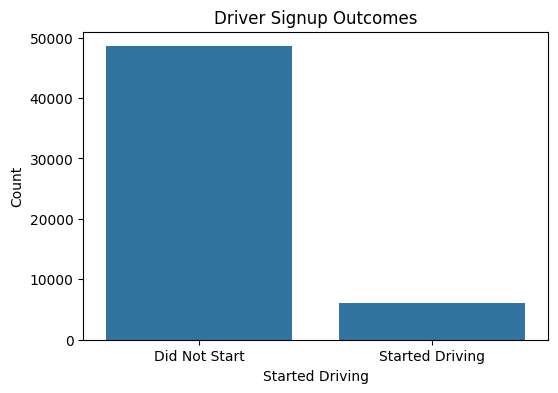

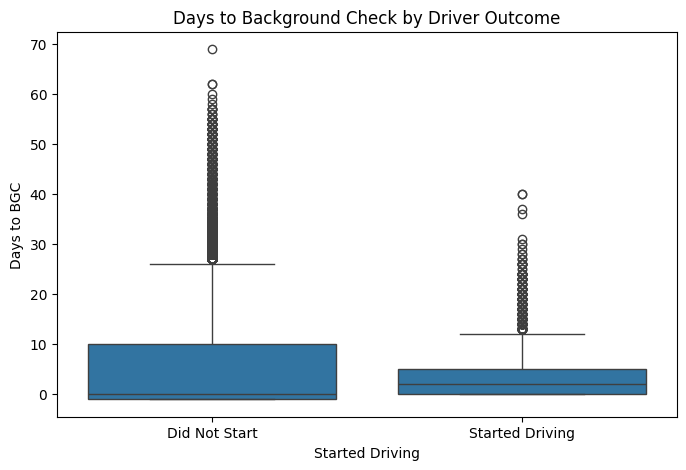

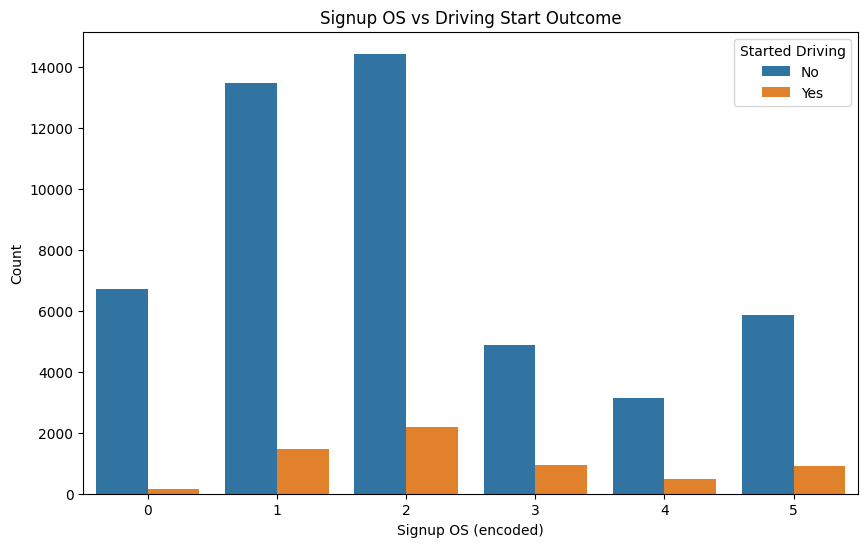

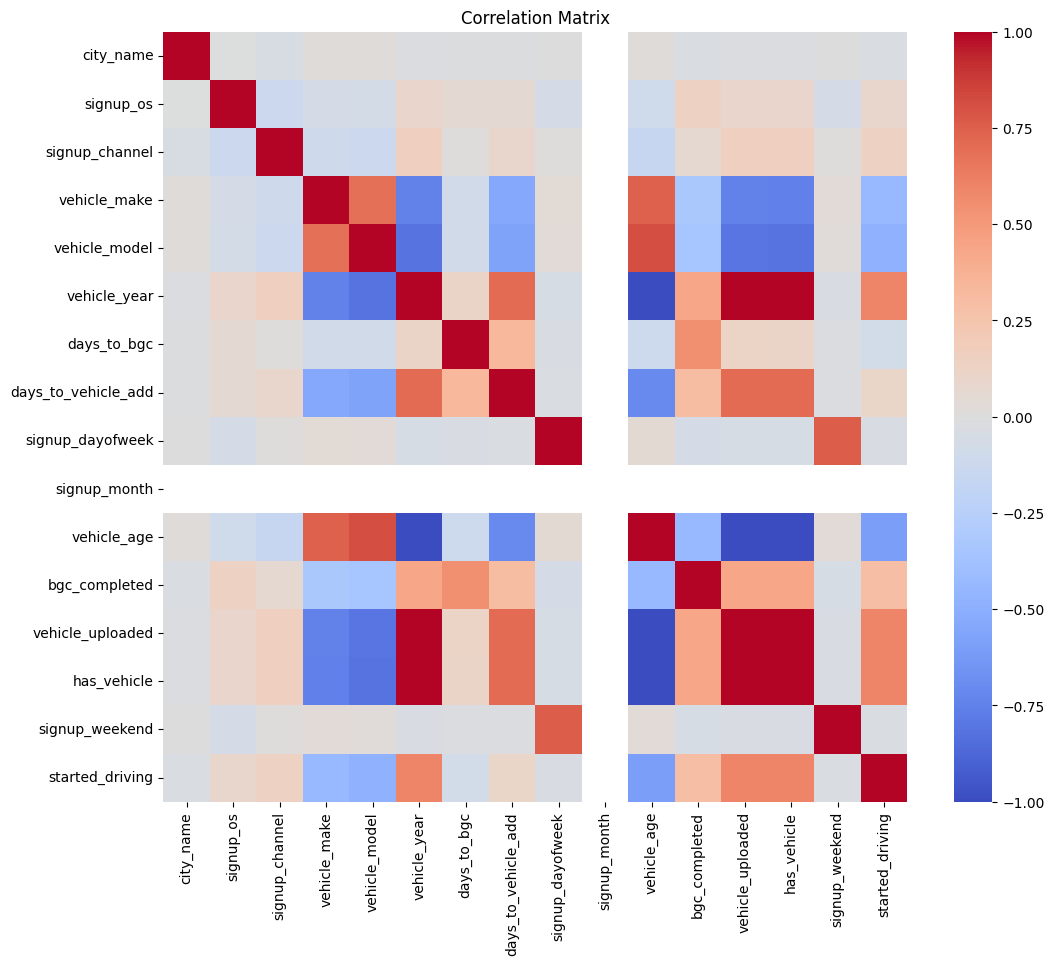

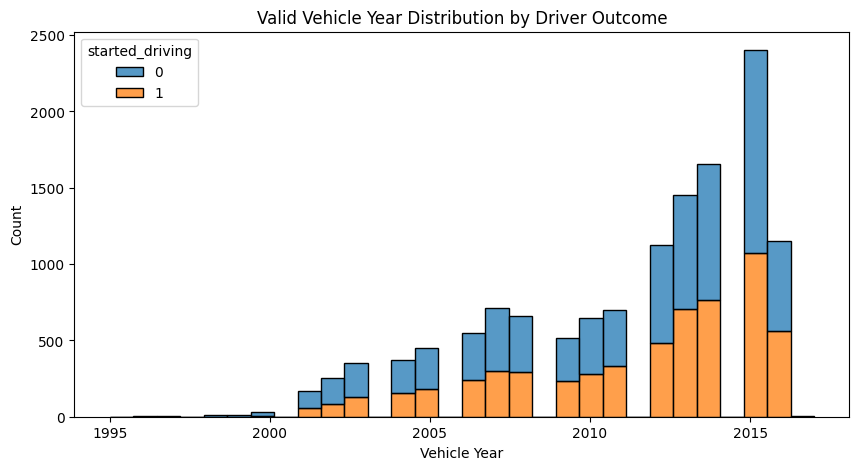

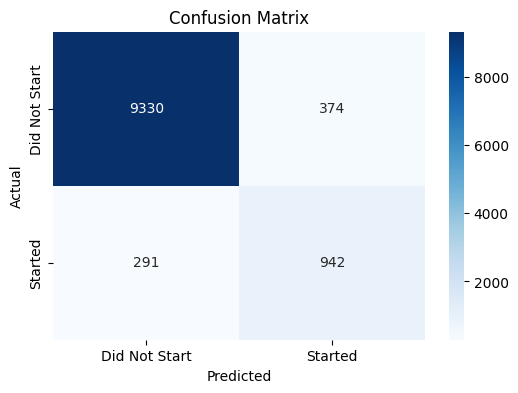

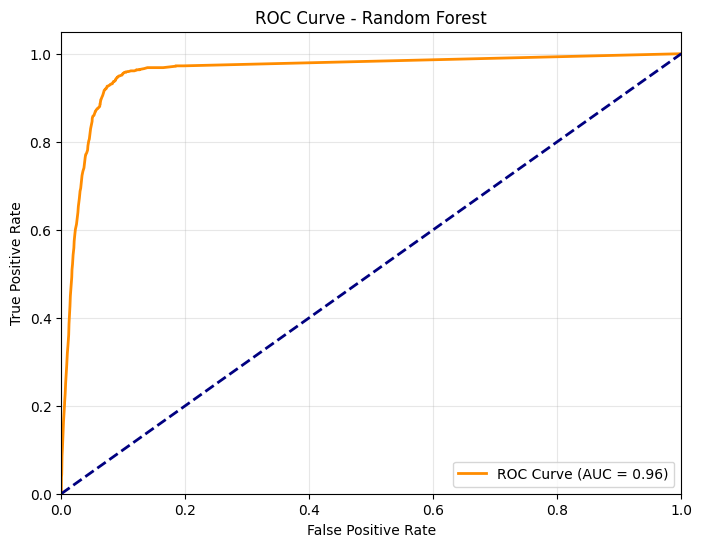

In [8]:
# Random Forest Model
df.info()

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, auc

from datetime import datetime

# Load CSV
df = pd.read_csv("ds_challenge_v2_1_data.csv")  # Adjust filename if needed
df.head()


df['started_driving'] = df['first_completed_date'].notnull().astype(int)
df['started_driving'].value_counts()



# Convert to datetime
date_cols = ['signup_date', 'bgc_date', 'vehicle_added_date']
for col in date_cols:
    df[col] = pd.to_datetime(df[col])

# Feature engineering
df['days_to_bgc'] = (df['bgc_date'] - df['signup_date']).dt.days
df['days_to_vehicle_add'] = (df['vehicle_added_date'] - df['signup_date']).dt.days
df['signup_dayofweek'] = df['signup_date'].dt.dayofweek
df['signup_month'] = df['signup_date'].dt.month



# Fill missing categoricals with 'Unknown'
for col in ['signup_os', 'vehicle_make', 'vehicle_model']:
    df[col] = df[col].fillna('Unknown')

# Fill missing numerics with -1
df['days_to_bgc'] = df['days_to_bgc'].fillna(-1)
df['days_to_vehicle_add'] = df['days_to_vehicle_add'].fillna(-1)
df['vehicle_year'] = df['vehicle_year'].fillna(-1)

# More derived features
df['vehicle_age'] = df['signup_date'].dt.year - df['vehicle_year']
df['bgc_completed'] = df['bgc_date'].notnull().astype(int)
df['vehicle_uploaded'] = df['vehicle_added_date'].notnull().astype(int)
df['vehicle_age'] = df['vehicle_age'].fillna(-1)


# More derviced features
df['has_vehicle'] = (df['vehicle_make'] != 'Unknown').astype(int)
df['signup_weekend'] = df['signup_date'].dt.dayofweek >= 5
df['signup_weekend'] = df['signup_weekend'].astype(int)



# Label encode for simplicity
categorical_cols = ['city_name', 'signup_os', 'signup_channel', 'vehicle_make', 'vehicle_model']
encoder = LabelEncoder()

for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])



# Drop irrelevant or target-related columns
features = df.drop(columns=['id', 'first_completed_date', 'started_driving', 'signup_date', 'bgc_date', 'vehicle_added_date'])

X = features
y = df['started_driving']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))


importances = pd.Series(model.feature_importances_, index=X_train.columns)
top_features = importances.sort_values(ascending=False).head(10)

plt.figure(figsize=(8, 6))
sns.barplot(x=top_features.values, y=top_features.index)
plt.title("Top 10 Important Features")
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(x='started_driving', data=df)
plt.title("Driver Signup Outcomes")
plt.xticks([0, 1], ['Did Not Start', 'Started Driving'])
plt.xlabel("Started Driving")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(x='started_driving', y='days_to_bgc', data=df)
plt.title("Days to Background Check by Driver Outcome")
plt.xticks([0, 1], ['Did Not Start', 'Started Driving'])
plt.xlabel("Started Driving")
plt.ylabel("Days to BGC")
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='signup_os', hue='started_driving')
plt.title("Signup OS vs Driving Start Outcome")
plt.xlabel("Signup OS (encoded)")
plt.ylabel("Count")
plt.legend(title="Started Driving", labels=["No", "Yes"])
plt.show()

plt.figure(figsize=(12, 10))
corr_matrix = df[features.columns.tolist() + ['started_driving']].corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title("Correlation Matrix")
plt.show()

# Filter out unrealistic vehicle years
current_year = datetime.now().year
valid_vehicle_df = df[(df['vehicle_year'] >= 1980) & (df['vehicle_year'] <= current_year)]

plt.figure(figsize=(10, 5))
sns.histplot(data=valid_vehicle_df, x='vehicle_year', hue='started_driving', bins=30, kde=False, multiple="stack")
plt.title("Valid Vehicle Year Distribution by Driver Outcome")
plt.xlabel("Vehicle Year")
plt.ylabel("Count")
plt.show()

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Did Not Start', 'Started'], yticklabels=['Did Not Start', 'Started'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot the curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

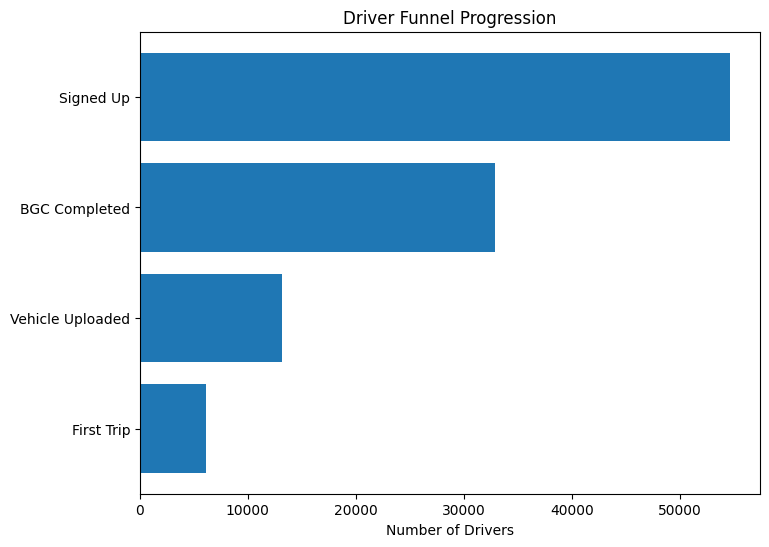

In [9]:
import matplotlib.pyplot as plt
df['bgc_completed'] = df['bgc_date'].notna().astype(int)
df['vehicle_uploaded'] = df['vehicle_added_date'].notna().astype(int)
df['first_trip_completed'] = df['first_completed_date'].notna().astype(int)
funnel_counts = {
    'Signed Up': len(df),
    'BGC Completed': df['bgc_completed'].sum(),
    'Vehicle Uploaded': df['vehicle_uploaded'].sum(),
    'First Trip': df['first_trip_completed'].sum()
}

plt.figure(figsize=(8, 6))
plt.barh(list(funnel_counts.keys()), list(funnel_counts.values()))
plt.title('Driver Funnel Progression')
plt.xlabel('Number of Drivers')
plt.gca().invert_yaxis()
plt.show()

/root/venv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [21:01:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
XGBoost Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      9704
           1       0.71      0.77      0.74      1233

    accuracy                           0.94     10937
   macro avg       0.84      0.86      0.85     10937
weighted avg       0.94      0.94      0.94     10937

ROC AUC: 0.9682765578896907


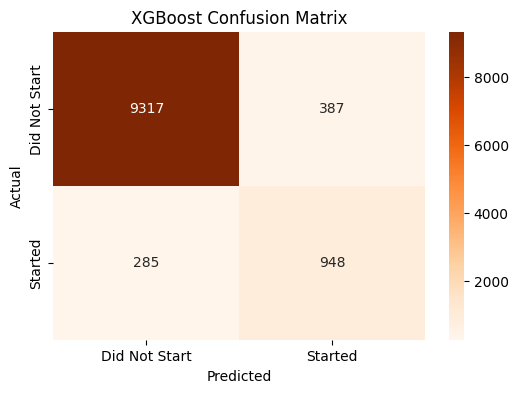

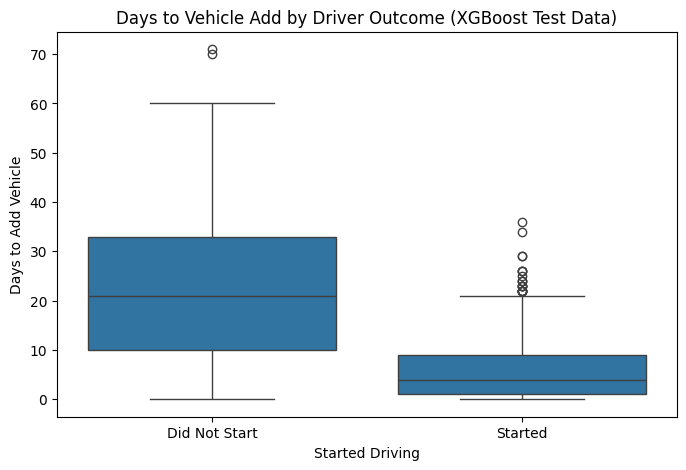

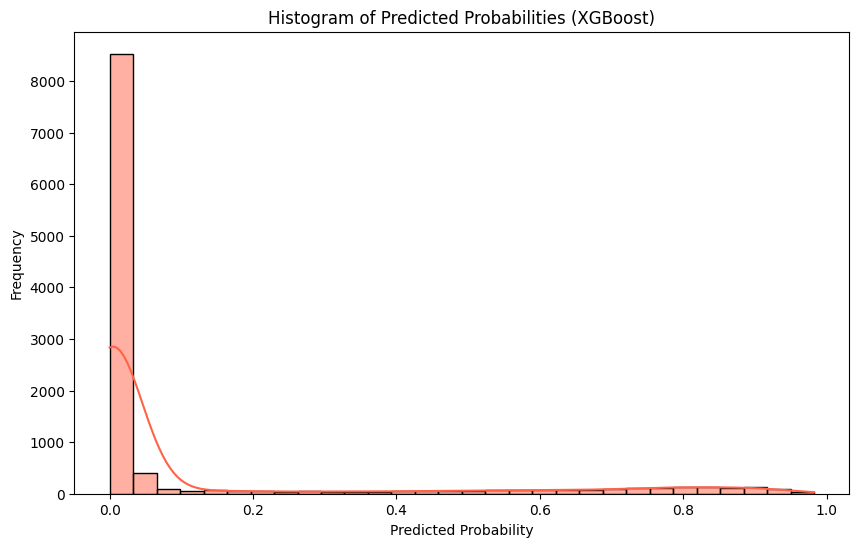

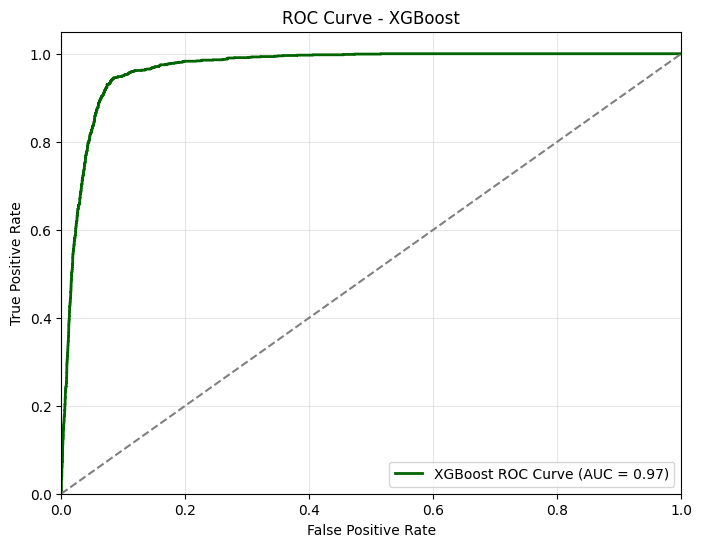

In [17]:
# Importing required libraries
from xgboost import XGBClassifier

# XGBoost Model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_proba = xgb_model.predict_proba(X_test)[:, 1]

print("XGBoost Report:")
print(classification_report(y_test, xgb_pred))
print("ROC AUC:", roc_auc_score(y_test, xgb_proba))

cm_xgb = confusion_matrix(y_test, xgb_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Oranges', xticklabels=['Did Not Start', 'Started'], yticklabels=['Did Not Start', 'Started'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('XGBoost Confusion Matrix')
plt.show()

df_test = X_test.copy()
df_test['started_driving'] = y_test.values
df_test['xgb_proba'] = xgb_proba

signup_channel_summary_xgb = df_test.groupby('signup_channel')['started_driving'].mean().sort_values()

df_test['signup_day'] = df.loc[df_test.index, 'signup_dayofweek'].map({0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'})
signup_day_summary_xgb = df_test.groupby('signup_day')['started_driving'].mean().reindex(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])


df_test['days_to_vehicle_add'] = df.loc[df_test.index, 'days_to_vehicle_add']

plt.figure(figsize=(8, 5))
sns.boxplot(data=df_test[df_test['days_to_vehicle_add'] >= 0], x='started_driving', y='days_to_vehicle_add')
plt.title("Days to Vehicle Add by Driver Outcome (XGBoost Test Data)")
plt.xlabel("Started Driving")
plt.ylabel("Days to Add Vehicle")
plt.xticks([0, 1], ['Did Not Start', 'Started'])
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(xgb_proba, bins=30, kde=True, color='tomato')
plt.title("Histogram of Predicted Probabilities (XGBoost)")
plt.xlabel("Predicted Probability")
plt.ylabel("Frequency")
plt.show()

valid_vehicle_df_xgb = valid_vehicle_df.copy()
valid_vehicle_df_xgb['xgb_pred'] = xgb_model.predict(valid_vehicle_df_xgb[features.columns])

# Compute ROC curve and AUC
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_proba)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, color='darkgreen', lw=2, label=f"XGBoost ROC Curve (AUC = {roc_auc_xgb:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - XGBoost")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      9704
           1       0.71      0.76      0.74      1233

    accuracy                           0.94     10937
   macro avg       0.84      0.86      0.85     10937
weighted avg       0.94      0.94      0.94     10937

ROC AUC: 0.9694758024884516


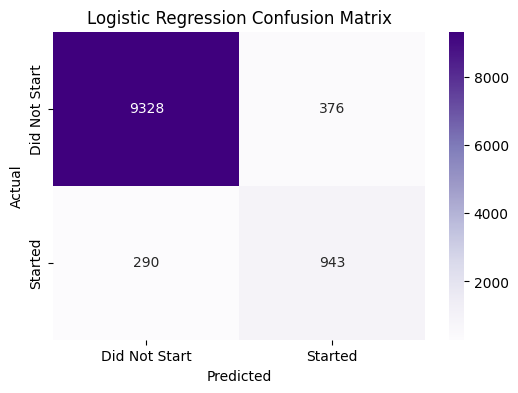

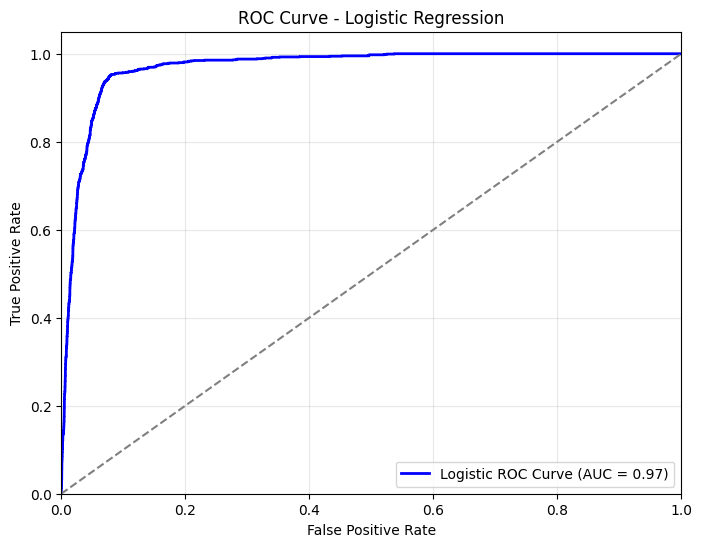

In [19]:
# Logistic Regression Model
log_model = LogisticRegression(max_iter=5000, C=10, penalty='l2', solver='lbfgs')
log_model.fit(X_train, y_train)
log_pred = log_model.predict(X_test)
log_proba = log_model.predict_proba(X_test)[:, 1]

print("Logistic Regression Report:")
print(classification_report(y_test, log_pred))
print("ROC AUC:", roc_auc_score(y_test, log_proba))

# Generate confusion matrix
cm_log = confusion_matrix(y_test, log_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Purples', 
            xticklabels=['Did Not Start', 'Started'], 
            yticklabels=['Did Not Start', 'Started'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

# Compute ROC curve and AUC
fpr_log, tpr_log, _ = roc_curve(y_test, log_proba)
roc_auc_log = auc(fpr_log, tpr_log)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log, color='blue', lw=2, label=f"Logistic ROC Curve (AUC = {roc_auc_log:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

Briefly discuss how Uber might leverage the insights gained from the model to generate more first trips.

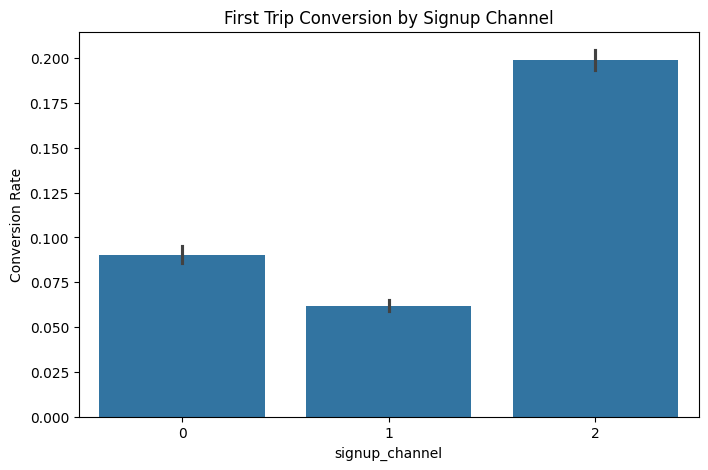

In [12]:
import seaborn as sns

# Signup channel
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='signup_channel', y='first_trip_completed')
plt.title('First Trip Conversion by Signup Channel')
plt.ylabel('Conversion Rate')
plt.show()

In [13]:
#from sklearn.model_selection import RandomizedSearchCV
#from scipy.stats import randint

#random_grid = {
#    'n_estimators': randint(100, 400),
#    'max_depth': [None] + list(range(10, 40, 10)),
#    'min_samples_split': randint(2, 11),
#    'min_samples_leaf': randint(1, 5),
#    'max_features': ['sqrt', 'log2']
#}

#random_search = RandomizedSearchCV(
#    estimator=RandomForestClassifier(random_state=42),
#    param_distributions=random_grid,
#    n_iter=50,  # number of random settings to try
#    cv=5,
#    scoring='roc_auc',
#    random_state=42,
#    n_jobs=-1,
#    verbose=2
#)

#random_search.fit(X_train, y_train)
# Ensamble Model
#print(random_search.best_score_)
#print(random_search.best_params_)
#{'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 382}


In [14]:
#from sklearn.model_selection import RandomizedSearchCV
#from scipy.stats import randint
#from sklearn.linear_model import LogisticRegression
#from sklearn.model_selection import GridSearchCV

#param_grid = {
#    'C': [0.001, 0.01, 0.1, 1, 10, 100],         # Inverse of regularization strength
#    'penalty': ['l2'],                           # 'l1' requires solver='liblinear'
#    'solver': ['lbfgs'],                         # 'lbfgs' supports only l2 penalty
#    'max_iter': [5000, 10000]
#}

#logreg = LogisticRegression()

#grid_search_log = GridSearchCV(
#    estimator=logreg,
#    param_grid=param_grid,
#    scoring='roc_auc',
#    cv=5,
#    n_jobs=-1,
#    verbose=2
#)

#grid_search_log.fit(X_train, y_train)

#print("Best Parameters:", grid_search_log.best_params_)

#best_log_model = grid_search_log.best_estimator_
#y_pred_log = best_log_model.predict(X_test)
#y_proba_log = best_log_model.predict_proba(X_test)[:, 1]

#from sklearn.metrics import classification_report, roc_auc_score
#print(classification_report(y_test, y_pred_log))
#print("Logistic Regression ROC AUC:", roc_auc_score(y_test, y_proba_log))

In [15]:
#param_grid = {
#    'n_estimators': [100, 200],
#    'max_depth': [3, 5, 7],
#    'learning_rate': [0.01, 0.1, 0.2],
#    'subsample': [0.7, 1.0],
#    'colsample_bytree': [0.7, 1.0]
#}
#xgb = XGBClassifier(
#    use_label_encoder=False,
#    eval_metric='logloss',
#    random_state=42
#)

#grid_search_xgb = GridSearchCV(
#    estimator=xgb,
#    param_grid=param_grid,
#    scoring='roc_auc',
#    cv=5,
#    n_jobs=-1,
#    verbose=2
#)

#grid_search_xgb.fit(X_train, y_train)
#print("Best Parameters:", grid_search_xgb.best_params_)

#best_xgb_model = grid_search_xgb.best_estimator_
#y_pred_xgb = best_xgb_model.predict(X_test)
#y_proba_xgb = best_xgb_model.predict_proba(X_test)[:, 1]

#from sklearn.metrics import classification_report, roc_auc_score
#print(classification_report(y_test, y_pred_xgb))
#print("XGBoost ROC AUC:", roc_auc_score(y_test, y_proba_xgb))

IndentationError: unexpected indent (2412363535.py, line 11)

/root/venv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [20:57:05] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      9704
           1       0.72      0.78      0.75      1233

    accuracy                           0.94     10937
   macro avg       0.84      0.87      0.86     10937
weighted avg       0.94      0.94      0.94     10937

Ensemble ROC AUC: 0.971702875512577


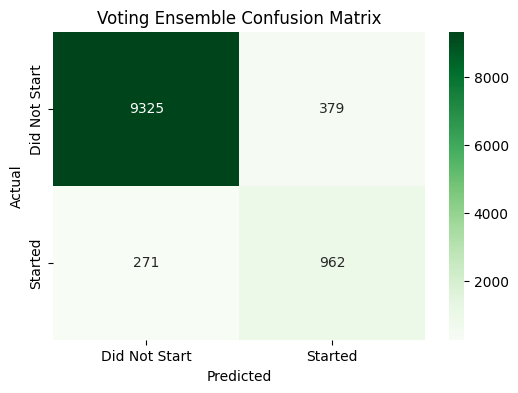

In [38]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

log_model = LogisticRegression(max_iter=5000, C=10, penalty='l2', solver='lbfgs')
rf_model = RandomForestClassifier(n_estimators=382, random_state=42, max_depth=10, max_features='sqrt', min_samples_leaf=1, min_samples_split=10)
xgb_model = XGBClassifier(
    use_label_encoder=False, 
    eval_metric='logloss', 
    colsample_bytree=1.0,  # Fixed syntax here
    learning_rate=0.1,     # Fixed syntax here
    max_depth=3, 
    n_estimators=100, 
    subsample=0.7, 
    random_state=42
)

ensemble_model = VotingClassifier(
    estimators=[
        ('logreg', log_model),
        ('rf', rf_model),
        ('xgb', xgb_model)
    ],
    voting='soft'  # 'soft' uses predicted probabilities, generally better
)
ensemble_model.fit(X_train, y_train)
y_pred_ensemble = ensemble_model.predict(X_test)
y_proba_ensemble = ensemble_model.predict_proba(X_test)[:, 1]

from sklearn.metrics import classification_report, roc_auc_score
print(classification_report(y_test, y_pred_ensemble))
print("Ensemble ROC AUC:", roc_auc_score(y_test, y_proba_ensemble))
# Compute confusion matrix
cm_ensemble = confusion_matrix(y_test, y_pred_ensemble)

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm_ensemble, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Did Not Start', 'Started'],
            yticklabels=['Did Not Start', 'Started'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Voting Ensemble Confusion Matrix')
plt.show()